In [3]:
import requests
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import seaborn as sns

In [4]:
test = {"City": ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix", "Philadelphia", "San Antonio", "San Diego", "Dallas", "San Jose"], "State": ["NY", "CA", "IL", "TX", "AZ", "PA", "TX", "CA", "TX", "CA"]}
test_df = pd.DataFrame(data=test)
test_df 

,City,State
0,New York,NY
1,Los Angeles,CA
2,Chicago,IL
3,Houston,TX
4,Phoenix,AZ
5,Philadelphia,PA
6,San Antonio,TX
7,San Diego,CA
8,Dallas,TX
9,San Jose,CA


In [5]:
test_df .replace(' ', '+',regex=True,inplace=True)
test_df

,City,State
0,New+York,NY
1,Los+Angeles,CA
2,Chicago,IL
3,Houston,TX
4,Phoenix,AZ
5,Philadelphia,PA
6,San+Antonio,TX
7,San+Diego,CA
8,Dallas,TX
9,San+Jose,CA


In [6]:
test_df['var'] = test_df.agg('{0[City]}%2C+{0[State]}'.format, axis=1)
test_df

,City,State,var
0,New+York,NY,New+York%2C+NY
1,Los+Angeles,CA,Los+Angeles%2C+CA
2,Chicago,IL,Chicago%2C+IL
3,Houston,TX,Houston%2C+TX
4,Phoenix,AZ,Phoenix%2C+AZ
5,Philadelphia,PA,Philadelphia%2C+PA
6,San+Antonio,TX,San+Antonio%2C+TX
7,San+Diego,CA,San+Diego%2C+CA
8,Dallas,TX,Dallas%2C+TX
9,San+Jose,CA,San+Jose%2C+CA


In [7]:
var = pd.Series(test_df['var'])

In [8]:
csv_path = "raw_covid_data/DS-C-19-COUNTIES-1.csv"
cov_counties_1_df  = pd.read_csv(csv_path, encoding="utf-8")

In [9]:
cov_counties_1_df.head()

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2013,Economic_typology_2015,POP_ESTIMATE_2018,N_POP_CHG_2018,Births_2018,Deaths_2018,...,Total number of UCR (Uniform Crime Report) Index crimes excluding arson.,Total number of UCR (Uniform Crime Report) index crimes reported including arson,MURDER,RAPE,ROBBERY,Number of AGGRAVATED ASSAULTS,BURGLRY,LARCENY,MOTOR VEHICLE THEFTS,ARSON
0,0,US,United States,NaN,NaN,NaN,327167434,2020313.0,3855500.0,2814013.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,4887871,12751.0,57216.0,53425.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001,AL,Autauga County,2.0,2.0,0.0,55601,158.0,655.0,532.0,...,139.0,1765.0,3.0,15.0,34.0,87.0,447.0,1233.0,85.0,108.0
3,1003,AL,Baldwin County,3.0,2.0,5.0,218022,5403.0,2254.0,2228.0,...,446.0,4988.0,8.0,30.0,76.0,332.0,967.0,3829.0,192.0,31.0
4,1005,AL,Barbour County,6.0,6.0,3.0,24881,-277.0,261.0,324.0,...,48.0,474.0,0.0,4.0,8.0,36.0,90.0,362.0,21.0,0.0


In [10]:
clean_county1_df = cov_counties_1_df[['Area_Name', 'State', 'POP_ESTIMATE_2018', 'Density per square mile of land area - Population', 'Unemployment_rate_2018', 'Median_Household_Income_2018', 'Total_Male', 'Total_Female', 'Total_age0to17', 'Male_age0to17', 'Female_age0to17', 'Total_age18to64', 'Male_age18to64', 'Female_age18to64', 'Total_age65plus', 'Male_age65plus', 'Female_age65plus', 'Total_age85plusr', 'Male_age85plusr', 'Female_age85plusr', 'ICU Beds', 'transit_scores - population weighted averages aggregated from town/city level to county']]
clean_county1_df.head()

,Area_Name,State,POP_ESTIMATE_2018,Density per square mile of land area - Population,Unemployment_rate_2018,Median_Household_Income_2018,Total_Male,Total_Female,Total_age0to17,Male_age0to17,...,Male_age18to64,Female_age18to64,Total_age65plus,Male_age65plus,Female_age65plus,Total_age85plusr,Male_age85plusr,Female_age85plusr,ICU Beds,transit_scores - population weighted averages aggregated from town/city level to county
0,United States,US,327167434,87.4,3.9,61937.0,161128679.0,166038755.0,73399342.0,37490849.0,...,100331012.0,101005887.0,52431193.0,23306818.0,29124375.0,6544503.0,2325693.0,4218810.0,NaN,NaN
1,Alabama,AL,4887871,94.4,3.9,49881.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Autauga County,AL,55601,91.8,3.6,59338.0,26995.0,28606.0,13163.0,6726.0,...,16482.0,17303.0,8653.0,3787.0,4866.0,871.0,329.0,542.0,6.0,0.0
3,Baldwin County,AL,218022,114.6,3.6,57588.0,105657.0,112365.0,47110.0,23810.0,...,61166.0,65175.0,44571.0,20681.0,23890.0,4304.0,1755.0,2549.0,51.0,368329051.0
4,Barbour County,AL,24881,31.0,5.2,34382.0,13133.0,11748.0,5192.0,2630.0,...,8414.0,6443.0,4832.0,2089.0,2743.0,472.0,148.0,324.0,5.0,0.0


In [11]:
clean_county1_df.rename(columns={"Area_Name": "County",
                                 "POP_ESTIMATE_2018": "Population_2018",
                                 "Density per square mile of land area - Population": "Population_Density_Per_Square_Mile",
                                 "transit_scores - population weighted averages aggregated from town/city level to county": "Aggregate_Transit_Score",
                                 "ICU Beds": "ICU_Beds"
                                }, inplace=True)
clean_county1_df.head()

C:\Users\rober\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,County,State,Population_2018,Population_Density_Per_Square_Mile,Unemployment_rate_2018,Median_Household_Income_2018,Total_Male,Total_Female,Total_age0to17,Male_age0to17,...,Male_age18to64,Female_age18to64,Total_age65plus,Male_age65plus,Female_age65plus,Total_age85plusr,Male_age85plusr,Female_age85plusr,ICU_Beds,Aggregate_Transit_Score
0,United States,US,327167434,87.4,3.9,61937.0,161128679.0,166038755.0,73399342.0,37490849.0,...,100331012.0,101005887.0,52431193.0,23306818.0,29124375.0,6544503.0,2325693.0,4218810.0,NaN,NaN
1,Alabama,AL,4887871,94.4,3.9,49881.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Autauga County,AL,55601,91.8,3.6,59338.0,26995.0,28606.0,13163.0,6726.0,...,16482.0,17303.0,8653.0,3787.0,4866.0,871.0,329.0,542.0,6.0,0.0
3,Baldwin County,AL,218022,114.6,3.6,57588.0,105657.0,112365.0,47110.0,23810.0,...,61166.0,65175.0,44571.0,20681.0,23890.0,4304.0,1755.0,2549.0,51.0,368329051.0
4,Barbour County,AL,24881,31.0,5.2,34382.0,13133.0,11748.0,5192.0,2630.0,...,8414.0,6443.0,4832.0,2089.0,2743.0,472.0,148.0,324.0,5.0,0.0


In [12]:
clean_county1_df['County'].replace(' County', '', regex=True, inplace=True)
clean_county1_df.head()

C:\Users\rober\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,County,State,Population_2018,Population_Density_Per_Square_Mile,Unemployment_rate_2018,Median_Household_Income_2018,Total_Male,Total_Female,Total_age0to17,Male_age0to17,...,Male_age18to64,Female_age18to64,Total_age65plus,Male_age65plus,Female_age65plus,Total_age85plusr,Male_age85plusr,Female_age85plusr,ICU_Beds,Aggregate_Transit_Score
0,United States,US,327167434,87.4,3.9,61937.0,161128679.0,166038755.0,73399342.0,37490849.0,...,100331012.0,101005887.0,52431193.0,23306818.0,29124375.0,6544503.0,2325693.0,4218810.0,NaN,NaN
1,Alabama,AL,4887871,94.4,3.9,49881.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Autauga,AL,55601,91.8,3.6,59338.0,26995.0,28606.0,13163.0,6726.0,...,16482.0,17303.0,8653.0,3787.0,4866.0,871.0,329.0,542.0,6.0,0.0
3,Baldwin,AL,218022,114.6,3.6,57588.0,105657.0,112365.0,47110.0,23810.0,...,61166.0,65175.0,44571.0,20681.0,23890.0,4304.0,1755.0,2549.0,51.0,368329051.0
4,Barbour,AL,24881,31.0,5.2,34382.0,13133.0,11748.0,5192.0,2630.0,...,8414.0,6443.0,4832.0,2089.0,2743.0,472.0,148.0,324.0,5.0,0.0


In [13]:
clean_county1_df.to_csv("clean_data/county_data_1.csv", index=False, header=True)

In [14]:
csv_path = "raw_covid_data/DS-C-19-COUNTIES-2.csv"
cov_counties_2_df  = pd.read_csv(csv_path, encoding="utf-8")
cov_counties_2_df.head(30)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
5,2020-01-25,Orange,California,6059.0,1,0
6,2020-01-25,Cook,Illinois,17031.0,1,0
7,2020-01-25,Snohomish,Washington,53061.0,1,0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0
9,2020-01-26,Los Angeles,California,6037.0,1,0


In [15]:
cov_counties2_df = cov_counties_2_df.groupby(['county', 'state']).agg({'cases': 'sum', 'deaths': 'sum'})

In [16]:
cov_counties2_df

cases  deaths
county    state                        
Abbeville South Carolina   1542       0
Acadia    Louisiana       10380     587
Accomack  Virginia        21017     303
Ada       Idaho           40601     930
Adair     Iowa              195       0
...                         ...     ...
Yuma      Arizona         13581     182
          Colorado          564       0
Zapata    Texas             351       0
Zavala    Texas             229       0
Ziebach   South Dakota       26       0

[3012 rows x 2 columns]

In [17]:
cov_counties2_df.reset_index()

,county,state,cases,deaths
0,Abbeville,South Carolina,1542,0
1,Acadia,Louisiana,10380,587
2,Accomack,Virginia,21017,303
3,Ada,Idaho,40601,930
4,Adair,Iowa,195,0
...,...,...,...,...
3007,Yuma,Arizona,13581,182
3008,Yuma,Colorado,564,0
3009,Zapata,Texas,351,0
3010,Zavala,Texas,229,0


In [18]:
cov_counties2_df.index = cov_counties2_df.index.set_names(['County', 'State'])
cov_counties2_df

cases  deaths
County    State                        
Abbeville South Carolina   1542       0
Acadia    Louisiana       10380     587
Accomack  Virginia        21017     303
Ada       Idaho           40601     930
Adair     Iowa              195       0
...                         ...     ...
Yuma      Arizona         13581     182
          Colorado          564       0
Zapata    Texas             351       0
Zavala    Texas             229       0
Ziebach   South Dakota       26       0

[3012 rows x 2 columns]

In [19]:
cov_counties2_df.reset_index(level=['County', 'State'], inplace=True)
cov_counties2_df

,County,State,cases,deaths
0,Abbeville,South Carolina,1542,0
1,Acadia,Louisiana,10380,587
2,Accomack,Virginia,21017,303
3,Ada,Idaho,40601,930
4,Adair,Iowa,195,0
...,...,...,...,...
3007,Yuma,Arizona,13581,182
3008,Yuma,Colorado,564,0
3009,Zapata,Texas,351,0
3010,Zavala,Texas,229,0


In [20]:
us_state_abbrev = {
'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

cov_counties2_df['State'] = cov_counties2_df['State'].map(us_state_abbrev).fillna(cov_counties2_df['State'])
cov_counties2_df

,County,State,cases,deaths
0,Abbeville,SC,1542,0
1,Acadia,LA,10380,587
2,Accomack,VA,21017,303
3,Ada,ID,40601,930
4,Adair,IA,195,0
...,...,...,...,...
3007,Yuma,AZ,13581,182
3008,Yuma,CO,564,0
3009,Zapata,TX,351,0
3010,Zavala,TX,229,0


In [21]:
cov_counties2_df.to_csv("clean_data/county_data_2.csv", index=False, header=True)

In [22]:
cov19_counties_merge = pd.merge(clean_county1_df, cov_counties2_df, how='outer', on=['County', 'State'])

cov19_counties_merge

,County,State,Population_2018,Population_Density_Per_Square_Mile,Unemployment_rate_2018,Median_Household_Income_2018,Total_Male,Total_Female,Total_age0to17,Male_age0to17,...,Total_age65plus,Male_age65plus,Female_age65plus,Total_age85plusr,Male_age85plusr,Female_age85plusr,ICU_Beds,Aggregate_Transit_Score,cases,deaths
0,United States,US,327167434.0,87.4,3.9,61937.0,161128679.0,166038755.0,73399342.0,37490849.0,...,52431193.0,23306818.0,29124375.0,6544503.0,2325693.0,4218810.0,NaN,NaN,NaN,NaN
1,Alabama,AL,4887871.0,94.4,3.9,49881.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Autauga,AL,55601.0,91.8,3.6,59338.0,26995.0,28606.0,13163.0,6726.0,...,8653.0,3787.0,4866.0,871.0,329.0,542.0,6.0,0.0,4434.0,152.0
3,Baldwin,AL,218022.0,114.6,3.6,57588.0,105657.0,112365.0,47110.0,23810.0,...,44571.0,20681.0,23890.0,4304.0,1755.0,2549.0,51.0,368329051.0,10465.0,278.0
4,Barbour,AL,24881.0,31.0,5.2,34382.0,13133.0,11748.0,5192.0,2630.0,...,4832.0,2089.0,2743.0,472.0,148.0,324.0,5.0,0.0,3157.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382,Webster,LA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5594.0,254.0
3383,West Baton Rouge,LA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6512.0,1161.0
3384,West Carroll,LA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,719.0,0.0
3385,West Feliciana,LA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7482.0,261.0


In [23]:
cov_counties_merged = cov19_counties_merge.dropna(how='any', subset=['Median_Household_Income_2018'])
cov_counties_merged

,County,State,Population_2018,Population_Density_Per_Square_Mile,Unemployment_rate_2018,Median_Household_Income_2018,Total_Male,Total_Female,Total_age0to17,Male_age0to17,...,Total_age65plus,Male_age65plus,Female_age65plus,Total_age85plusr,Male_age85plusr,Female_age85plusr,ICU_Beds,Aggregate_Transit_Score,cases,deaths
0,United States,US,327167434.0,87.4,3.9,61937.0,161128679.0,166038755.0,73399342.0,37490849.0,...,52431193.0,23306818.0,29124375.0,6544503.0,2325693.0,4218810.0,NaN,NaN,NaN,NaN
1,Alabama,AL,4887871.0,94.4,3.9,49881.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Autauga,AL,55601.0,91.8,3.6,59338.0,26995.0,28606.0,13163.0,6726.0,...,8653.0,3787.0,4866.0,871.0,329.0,542.0,6.0,0.0,4434.0,152.0
3,Baldwin,AL,218022.0,114.6,3.6,57588.0,105657.0,112365.0,47110.0,23810.0,...,44571.0,20681.0,23890.0,4304.0,1755.0,2549.0,51.0,368329051.0,10465.0,278.0
4,Barbour,AL,24881.0,31.0,5.2,34382.0,13133.0,11748.0,5192.0,2630.0,...,4832.0,2089.0,2743.0,472.0,148.0,324.0,5.0,0.0,3157.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,Sweetwater,WY,43051.0,4.2,4.2,73315.0,22152.0,20899.0,11290.0,5773.0,...,5214.0,2546.0,2668.0,471.0,160.0,311.0,10.0,0.0,1051.0,0.0
3190,Teton,WY,23081.0,5.3,3.0,99087.0,11909.0,11172.0,4239.0,2167.0,...,3558.0,1796.0,1762.0,325.0,132.0,193.0,6.0,0.0,5375.0,39.0
3191,Uinta,WY,20299.0,10.1,4.4,63401.0,10285.0,10014.0,5844.0,3018.0,...,2858.0,1417.0,1441.0,255.0,89.0,166.0,6.0,156203456.0,456.0,0.0
3192,Washakie,WY,7885.0,3.8,4.2,55190.0,3988.0,3897.0,1793.0,912.0,...,1710.0,828.0,882.0,242.0,97.0,145.0,0.0,0.0,667.0,22.0


In [24]:
cov_counties_merge = cov_counties_merged.dropna(subset = ['Total_Male'])
cov_counties_merge

,County,State,Population_2018,Population_Density_Per_Square_Mile,Unemployment_rate_2018,Median_Household_Income_2018,Total_Male,Total_Female,Total_age0to17,Male_age0to17,...,Total_age65plus,Male_age65plus,Female_age65plus,Total_age85plusr,Male_age85plusr,Female_age85plusr,ICU_Beds,Aggregate_Transit_Score,cases,deaths
0,United States,US,327167434.0,87.4,3.9,61937.0,161128679.0,166038755.0,73399342.0,37490849.0,...,52431193.0,23306818.0,29124375.0,6544503.0,2325693.0,4218810.0,NaN,NaN,NaN,NaN
2,Autauga,AL,55601.0,91.8,3.6,59338.0,26995.0,28606.0,13163.0,6726.0,...,8653.0,3787.0,4866.0,871.0,329.0,542.0,6.0,0.0,4434.0,152.0
3,Baldwin,AL,218022.0,114.6,3.6,57588.0,105657.0,112365.0,47110.0,23810.0,...,44571.0,20681.0,23890.0,4304.0,1755.0,2549.0,51.0,368329051.0,10465.0,278.0
4,Barbour,AL,24881.0,31.0,5.2,34382.0,13133.0,11748.0,5192.0,2630.0,...,4832.0,2089.0,2743.0,472.0,148.0,324.0,5.0,0.0,3157.0,33.0
5,Bibb,AL,22400.0,36.8,4.0,46064.0,11921.0,10479.0,4587.0,2399.0,...,3690.0,1627.0,2063.0,363.0,108.0,255.0,0.0,158361697.0,2291.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,Sweetwater,WY,43051.0,4.2,4.2,73315.0,22152.0,20899.0,11290.0,5773.0,...,5214.0,2546.0,2668.0,471.0,160.0,311.0,10.0,0.0,1051.0,0.0
3190,Teton,WY,23081.0,5.3,3.0,99087.0,11909.0,11172.0,4239.0,2167.0,...,3558.0,1796.0,1762.0,325.0,132.0,193.0,6.0,0.0,5375.0,39.0
3191,Uinta,WY,20299.0,10.1,4.4,63401.0,10285.0,10014.0,5844.0,3018.0,...,2858.0,1417.0,1441.0,255.0,89.0,166.0,6.0,156203456.0,456.0,0.0
3192,Washakie,WY,7885.0,3.8,4.2,55190.0,3988.0,3897.0,1793.0,912.0,...,1710.0,828.0,882.0,242.0,97.0,145.0,0.0,0.0,667.0,22.0


In [25]:
cov_counties_merge.to_csv("clean_data/county_data_merged.csv", index=False, header=True)

In [26]:
csv_path = "raw_covid_data/DS-C-19-STATES.csv"
cov_state_df= pd.read_csv(csv_path, encoding="utf-8")
cov_state_df.head()

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,36380,399,10,734002,1.2863,0.4081,119,59687,73205,...,21,11064,6.4,1.0,26.6,66.0,0.36,0.39,0.25,03/19/20
1,Alabama,157566,12376,504,4908621,96.9221,0.4847,1533,42334,45219,...,101,7281,8.1,1.0,62.8,59.0,0.33,0.37,0.31,03/16/20
2,Arkansas,93701,4923,102,3038999,58.4030,0.4719,732,42566,42454,...,88,7408,7.1,0.0,60.4,56.2,0.34,0.37,0.30,03/17/20
3,Arizona,220612,14566,704,7378494,64.9550,0.4713,1559,43650,48055,...,83,6452,9.7,1.0,60.3,89.8,0.33,0.36,0.30,03/16/20
4,California,1339316,81795,3334,39937489,256.3727,0.4899,7338,62586,74205,...,359,7549,12.8,9.0,59.4,95.0,0.33,0.40,0.26,03/19/20


In [27]:
cov_state_df = cov_state_df.drop(['Gini', 'Pollution', 'Med-Large Airports', 'Temperature', 'Urban', 'Sex Ratio', 'Smoking Rate'], axis=1)
cov_state_df

,State,Tested,Infected,Deaths,Population,Pop Density,ICU Beds,Income,GDP,Unemployment,Flu Deaths,Respiratory Deaths,Physicians,Hospitals,Health Spending,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,36380,399,10,734002,1.2863,119,59687,73205,5.8,12.1,35.3,1900,21,11064,0.36,0.39,0.25,03/19/20
1,Alabama,157566,12376,504,4908621,96.9221,1533,42334,45219,2.7,21.4,58.0,12205,101,7281,0.33,0.37,0.31,03/16/20
2,Arkansas,93701,4923,102,3038999,58.4030,732,42566,42454,3.5,18.0,61.7,7150,88,7408,0.34,0.37,0.30,03/17/20
3,Arizona,220612,14566,704,7378494,64.9550,1559,43650,48055,4.5,12.4,41.2,17806,83,6452,0.33,0.36,0.30,03/16/20
4,California,1339316,81795,3334,39937489,256.3727,7338,62586,74205,3.9,15.6,30.9,112906,359,7549,0.33,0.40,0.26,03/19/20
5,Colorado,131837,22482,1257,5845526,56.4011,1597,56846,63882,2.5,9.7,44.0,14509,89,6804,0.33,0.40,0.27,03/23/20
6,Connecticut,185520,38430,3472,3563077,735.8689,674,74561,76342,3.8,14.8,28.9,15605,32,9859,0.30,0.38,0.32,03/17/20
7,District of Columbia,39374,7434,400,720687,11814.5410,314,47285,200277,5.2,11.2,19.6,7346,10,11944,0.30,0.48,0.22,03/16/20
8,Delaware,44132,8037,304,982895,504.3073,186,51449,77253,3.9,13.1,40.4,3148,7,10254,0.30,0.37,0.33,03/16/20
9,Florida,681314,45684,2052,21992985,410.1256,5604,49417,48318,2.8,9.6,37.0,56499,217,8076,0.29,0.37,0.35,03/16/20


In [28]:
cov_state_df.columns = cov_state_df.columns.str.replace(' ', '_')
cov_state_df.head()

,State,Tested,Infected,Deaths,Population,Pop_Density,ICU_Beds,Income,GDP,Unemployment,Flu_Deaths,Respiratory_Deaths,Physicians,Hospitals,Health_Spending,Age_0-25,Age_26-54,Age_55+,School_Closure_Date
0,Alaska,36380,399,10,734002,1.2863,119,59687,73205,5.8,12.1,35.3,1900,21,11064,0.36,0.39,0.25,03/19/20
1,Alabama,157566,12376,504,4908621,96.9221,1533,42334,45219,2.7,21.4,58.0,12205,101,7281,0.33,0.37,0.31,03/16/20
2,Arkansas,93701,4923,102,3038999,58.4030,732,42566,42454,3.5,18.0,61.7,7150,88,7408,0.34,0.37,0.30,03/17/20
3,Arizona,220612,14566,704,7378494,64.9550,1559,43650,48055,4.5,12.4,41.2,17806,83,6452,0.33,0.36,0.30,03/16/20
4,California,1339316,81795,3334,39937489,256.3727,7338,62586,74205,3.9,15.6,30.9,112906,359,7549,0.33,0.40,0.26,03/19/20


In [29]:
cov_state_df.to_csv("clean_data/state_data_1.csv", index=False, header=True)

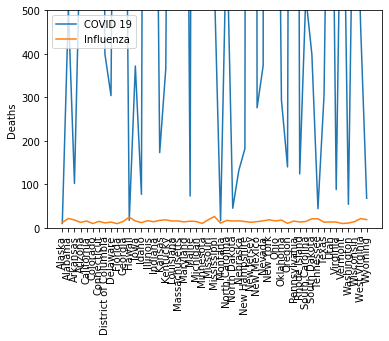

<Figure size 432x288 with 0 Axes>

In [56]:
# Comparison of COVID deaths to Flu deaths
x1 = cov_state_df["State"]
Covid_19_Deaths = cov_state_df["Deaths"]
Flu_Deaths = cov_state_df["Flu_Deaths"]

x_axis = np.arange(len(cov_state_df))
tick_locations = [value for value in x_axis]

COVID_19, = plt.plot(x1, Covid_19_Deaths, label="COVID 19")
Influenza, = plt.plot(x1, Flu_Deaths, label="Influenza")

#plt.figure(figsize=(20,20))
plt.xticks(tick_locations, rotation=90)
plt.legend(handles=[COVID_19, Influenza], loc="best")
plt.ylabel("Deaths")
plt.ylim(0,500)
plt.show()
plt.tight_layout()

In [63]:
healthy = cov_state_df["Tested"] - cov_state_df["Infected"] + cov_state_df["Deaths"]
infected = cov_state_df["Infected"]
deaths = cov_state_df["Deaths"]
labeling = ["Healthy", "Infected", "Deaths"]

pied_df = pd.DataFrame({"Healthy": healthy, "Infected": infected, "Deaths": deaths})
pied_df


,Healthy,Infected,Deaths
0,35991,399,10
1,145694,12376,504
2,88880,4923,102
3,206750,14566,704
4,1260855,81795,3334
5,110612,22482,1257
6,150562,38430,3472
7,32340,7434,400
8,36399,8037,304
9,637682,45684,2052


In [66]:
labeling = ["Healthy", "Infected", "Deaths"]

hey = pied_df.plot(pied_df, kind="pie", labels=labeling, autopct="%.1f%%")
hey

ValueError: pie requires either y column or 'subplots=True'